# <font color='#20b2aa'> **Project: Investigating The World Happiness Report Dataset** </font>

## <font color='#20b2aa'> Table of Contents </font>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#findings">Findings</a></li>
</ul>

<a id='intro'></a>
## <font color='#20b2aa'> **1. Introduction** </font>

### <font color='#20b2aa'> **Dataset Description** </font>

> Our analyses will be focused on a data set titled 'World Happiness Report for 2022', a landmark survey that uses an array of wellbeing metrics to assess the state of happiness among the world's nations. The data set contains information on 146 countries and contains the following fields:

- **Rank**: country's rank based on happiness

- **Country:** name of countries

- **Happiness_score:** happiness index of country

- **Whisker-high(Whisker-low):** happiness index on a scale 

- **Dystopia (1.83) + residual:** index of how people view state of country

- **Explained by: GDP per capita:** country's GDP per capita

- **Explained by: Social support**: country's level of social support

- **Explained by: Healthy life expectancy:** country's reported life expectancy

- **Explained by: Freedom to make life choices:** country's overall level of freedom

- **Explained by: Generosity:** happiness compared to people's attitude(generosity)

- **Explained by: Perceptions of corruption:** index of how people view their government corruption

## <font color='20b2aa'> **Research Questions** </font>
> The following research questions will help guide our analyses:

- **What does happiness index look like across the world?**

- **What affects happiness index?**

- **Can we group countries based on features such as economic production, social support, life expectancy etc?**

- **What impact did COVID-19 have on this index?**

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<a id='cleaning'></a>
##  <font color='20b2aa'> 2. Data Cleaning </font>

> In this section of our project, we will load in the data, check for cleanliness, and then clean the dataset where necessary to prepare for analysis.

In [3]:
#load the data
happy = pd.read_csv('happiness_report.csv')

First, we display the first few rows of the data set to ensure file delimiter is indeed a comma, as well as get an overall feel of what our data looks like!

In [5]:
happy.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


#### <font color='20b2aa'> 2.1. Renaming Columns </font>
Almost immediately, we notice that the column names are quite long so we will rename the columns so that the labels are a bit more concise.

In [4]:
new_labels = ['rank', 'country', 'happiness_score', 'whisker_high', 'whisker_low', 'dystopia', 'gdp_per_capita',
              'social_support', 'life_expectancy', 'freedom_of_choice', 'generosity', 'perceived_corruption']
happy.columns = new_labels
happy.columns

Index(['rank', 'country', 'happiness_score', 'whisker_high', 'whisker_low',
       'dystopia', 'gdp_per_capita', 'social_support', 'life_expectancy',
       'freedom_of_choice', 'generosity', 'perceived_corruption'],
      dtype='object')

#### <font color='20b2aa'> 2.2. Changing the Index </font>
We decided it might be best to set the dataframe's index to 'rank' so that we can access each row by its rank.

In [4]:
happy.set_index('rank', inplace=True)

#### <font color='20b2aa'> 2.3.Checking for Null Values </font>
Next, we handle missing data, if any.

In [48]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  146 non-null    int64  
 1   country               146 non-null    object 
 2   happiness_score       146 non-null    float64
 3   whisker_high          146 non-null    float64
 4   whisker_low           146 non-null    float64
 5   dystopia              146 non-null    float64
 6   gdp_per_capita        146 non-null    float64
 7   social_support        146 non-null    float64
 8   life_expectancy       146 non-null    float64
 9   freedom_of_choice     146 non-null    float64
 10  generosity            146 non-null    float64
 11  perceived_corruption  146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.8+ KB


There appear to be no missing values in our data.

#### <font color='20b2aa'> 2.4. Checking for Duplicate Data </font>
Are there any duplicate records in our data set?

In [5]:
sum(happy.duplicated())

0

No duplicate data here, whew!

#### <font color='20b2aa'> 2.5. Removing Asterisk From Some of the Country Names </font>
Some of the country names have an asterisk attached to them so we will use the replace function to remove the asterisks from the names.

In [5]:
countryname_dict = {"Luxembourg*": "Luxembourg", 
                    "Guatemala*": "Guatemala",
                    "Kuwait*": "Kuwait",
                    "Belarus*": "Belarus",
                    "Turkmenistan*": "Turkmenistan",
                    "North Cyprus*": "North Cyprus",
                    "Libya*": "Libya",
                    "Azerbaijan*": "Azerbaijan",
                    "Gambia*": "Gambia",
                    "Liberia*": "Liberia",
                    "Niger*": "Niger",
                    "Comoros*": "Comoros",
                    "Palestinian Territories*": "Palestinian Territories",
                    "Eswatini, Kingdom of*": "Eswatini, Kingdom of",
                    "Madagascar*": "Madagascar",
                    "Chad*": "Chad",
                    "Yemen*": "Yemen",
                    "Mauritania*": "Mauritania",
                    "Lesotho*": "Lesotho",
                    "Botswana*": "Botswana",
                    "Rwanda*": "Rwanda",}
happy["country"] = happy["country"].replace(countryname_dict)

#### <font color='20b2aa'> 2.6. Checking for Errant Values </font>
We want to check for values in our data that seem erroneos or logically impossible. To do this, we will use the *describe* function, and maybe plot some graphs if any further the analyses is needed. 

In [50]:
happy.describe()

,rank,happiness_score,whisker_high,whisker_low,dystopia,gdp_per_capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


Upon initial inspection, there seems to be no cause for concern seeing as there are no unusual values. To be sure, we will plot a few boxplots.

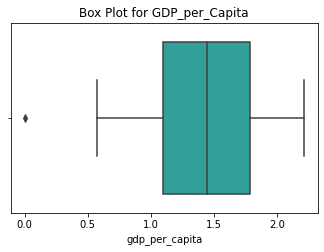

In [70]:
def boxplot(df, column_name):
    fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey=True, figsize=(5.5, 3.5))
    g = sns.boxplot(df, color = '#20b2aa')
    g.set_title('Box Plot for {}'.format(column_name));
    
boxplot(happy.gdp_per_capita, 'GDP_per_Capita')

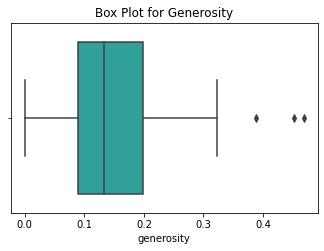

In [71]:
boxplot(happy.generosity, 'Generosity')

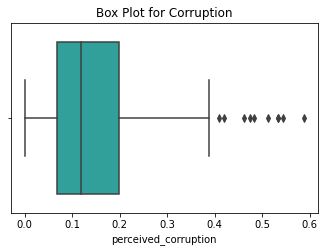

In [72]:
boxplot(happy.perceived_corruption, 'Corruption')

Let us further investigate the apparent outliers in the 'Perceived Corruption' column.

In [ ]:
happy.query('perceived_corruption > 0.4')

In [80]:
happy.query('gdp_per_capita == 0')

,rank,country,happiness_score,whisker_high,whisker_low,dystopia,gdp_per_capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
107,108,Venezuela,4.925,5.051,4.8,2.79,0.0,0.968,0.578,0.283,0.225,0.082


> Further investigation reveals that the 'outliers' are no cause for concern! It is understood that, for some reason or another, certain countries score much higher or lower in some areas than other countries do. Admittedly, we found it strange that certain countries had a reported life expectancy of zero.

### <font color='20b2aa'> 3. Preliminary Analytics </font>
Now that our data is all clean and ready to go, we will venture into some prelimary analytics, computing stats and creating visuals that will serve as a basis for exploring our main research questions!

We first plot histograms so we can assess the distribution of our numerical data.

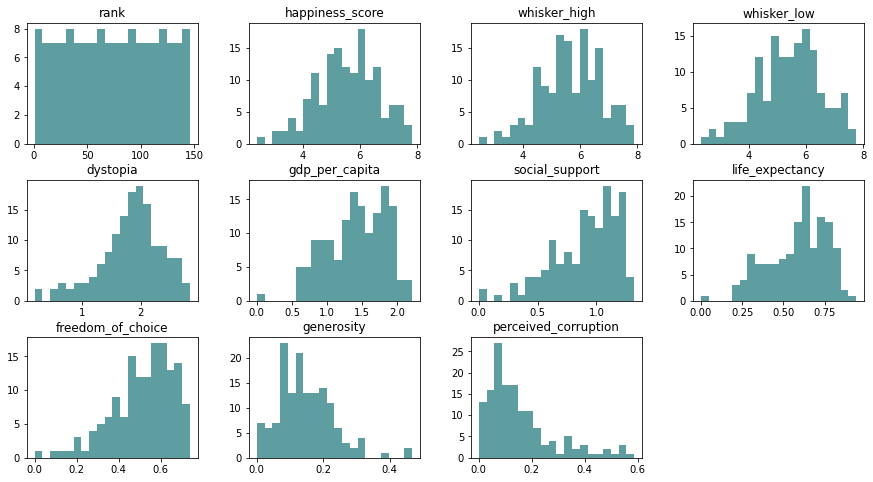

In [154]:
happy.hist(bins = 20, figsize = (15,8), layout = (3,4), grid=False, color = '#5f9ea0');

Notes:
> 1. Quite a few of our numerical fields have a bell-shaped distribution as they are continuous in nature.
2. Fields such as 'Dystopia' and 'Social Support' are skewed to the right, while others such as 'Perceived Corruption' are heavily skewed to the left. 

<a id='eda'></a>
##  <font color='20b2aa'> 4. EDA Guided By Our Research Questions </font>

### <font color='20b2aa'> 4.3. Grouping Countries Based on Features of Interest </font>
Because our data set comprises mainly of numerical features, we will need create our own categorical features so that we can successfully group the countries. We will do this by splitting certain fields according to its percentiles.

In [75]:
happy.describe()

,rank,happiness_score,whisker_high,whisker_low,dystopia,gdp_per_capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [209]:
#creating categories for gdp per capita
bin_edges = [0,1.096,1.446,1.785,2.209]
bin_names = ['Low','Medium','Medium-High','High']
happy['gdp_categorized'] = pd.cut(happy['gdp_per_capita'], bin_edges, labels=bin_names)

In [210]:
#creating categories for social support
bin_edges = [0,0.732,0.958,1.114,1.320]
bin_names = ['Low','Medium','Medium-High','High']
happy['socialS_categorized'] = pd.cut(happy['social_support'], bin_edges, labels=bin_names)

In [211]:
#creating categories for life expectancy
bin_edges = [0,0.463,0.622,0.720,0.942]
bin_names = ['Low','Medium','Medium-High','High']
happy['lifeExp_categorized'] = pd.cut(happy['life_expectancy'], bin_edges, labels=bin_names)

In [212]:
#creating categories for perceived corruption
bin_edges = [0,0.068,0.120,0.199,0.587]
bin_names = ['Low','Medium','Medium-High','High']
happy['corruption_categorized'] = pd.cut(happy['perceived_corruption'], bin_edges, labels=bin_names)

#### <font color='20b2aa'> Exploring Relationships Using These New Categories 

In [100]:
a = happy.groupby('lifeExp_categorized')['happiness_score'].mean()
a

lifeExp_categorized
Low            4.397861
Medium         5.459806
Medium-High    5.705216
High           6.703917
Name: happiness_score, dtype: float64

In [6]:
arry = np.r_[85, 87, 90, 92, 95, 96, 98:104, 105, 108, 110, 112, 114:120, 122, 123, 127:131, 132, 134, 136:145]
africa = happy.iloc[arry]
africa

,rank,country,happiness_score,whisker_high,whisker_low,dystopia,gdp_per_capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
85,86,Libya,5.330,5.543,5.118,1.544,1.476,0.943,0.606,0.477,0.106,0.179
87,88,Ivory Coast,5.235,5.384,5.085,2.652,1.094,0.442,0.322,0.451,0.149,0.124
90,91,South Africa,5.194,5.315,5.073,1.742,1.425,1.088,0.361,0.442,0.089,0.046
92,93,Gambia,5.164,5.409,4.918,2.531,0.785,0.621,0.369,0.367,0.388,0.103
95,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
96,97,Liberia,5.122,5.428,4.815,2.844,0.636,0.670,0.309,0.405,0.178,0.080
98,99,Congo,5.075,5.235,4.915,2.658,0.950,0.405,0.355,0.431,0.130,0.146
99,100,Morocco,5.060,5.181,4.938,2.405,1.208,0.268,0.565,0.492,0.020,0.102
100,101,Mozambique,5.048,5.273,4.823,2.641,0.578,0.660,0.191,0.593,0.185,0.200
101,102,Cameroon,5.048,5.188,4.907,2.469,0.968,0.672,0.317,0.397,0.152,0.074


In [7]:
new_rank = {86:1, 88:2, 91:3, 93:4,
           96:5, 97:6, 99:7, 100:8,
           101:9, 102:10, 103:11, 104:12,
           106:13, 109:14, 111:15, 113:16,
            115:17, 116:18, 117:19, 118:20,
            119:21, 120:22, 123:23, 124:24,
            128:25, 129:26, 130:27, 131:28,
            133:29, 135:30, 137:31, 138:32,
            139:33, 140:34, 141:35, 142:36,
            143:37, 144:38, 145:39
           }
africa['rank'] = africa['rank'].replace(new_rank)
africa.set_index('rank', inplace=True)

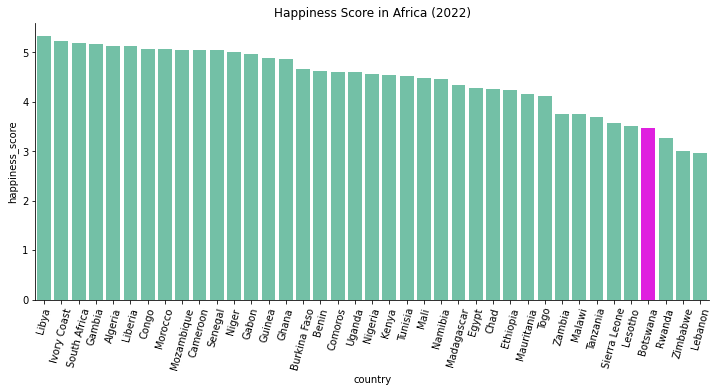

In [257]:
clrs = ['#ff00ff' if (x == 'Botswana') else '#66cdaa' for x in africa.country ]
graphic = sns.catplot(x = 'country', y = 'happiness_score', kind='bar', palette=clrs, data=africa)
graphic.fig.set_size_inches(11.5,4.5)
plt.title('Happiness Score in Africa (2022)')
plt.setp(graphic.ax.get_xticklabels(), rotation=75);
graphic

In [8]:
df = africa.iloc[:3]

In [9]:
df.gdp_per_capita.mean()

1.3316666666666668

In [11]:
africa.mean()

happiness_score         4.451103
whisker_high            4.612795
whisker_low             4.289487
dystopia                1.804077
gdp_per_capita          0.981897
social_support          0.608538
life_expectancy         0.381103
freedom_of_choice       0.403949
generosity              0.149410
perceived_corruption    0.122282
dtype: float64

In [9]:
africa.query('country == "Botswana"')

,country,happiness_score,whisker_high,whisker_low,dystopia,gdp_per_capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
rank,,,,,,,,,,,
36,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.28,0.571,0.012,0.102


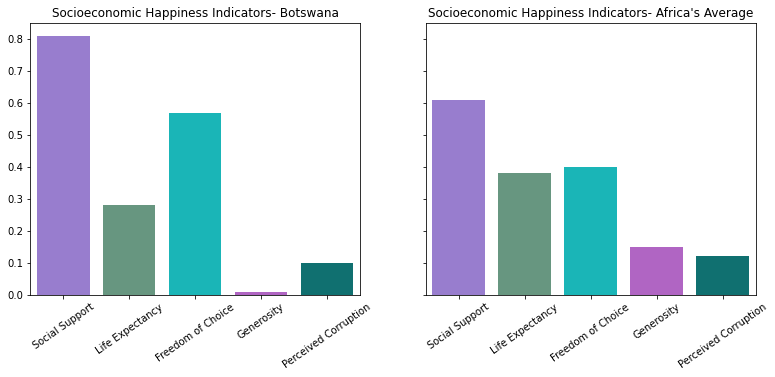

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey=True, figsize=(13, 5))
colors = ['#9370db', '#5f9e80', '#00ced1', '#ba55d3', '#008080', '#4682b4']
values1 = np.array([0.81,0.28,0.57,0.01,0.10])
values2 = np.array([0.61,0.38,0.40,0.15,0.12])
labels = ['Social Support', 'Life Expectancy', 'Freedom of Choice', 'Generosity', 'Perceived Corruption']
bots = sns.barplot(x=labels, y=values1, palette=colors, ax=axes[0])
avg = sns.barplot(x=labels, y=values2, palette=colors, ax=axes[1])
axes[0].set_title('Socioeconomic Happiness Indicators- Botswana')
axes[1].set_title("Socioeconomic Happiness Indicators- Africa's Average")
plt.setp(bots.get_xticklabels(), rotation=35)
plt.setp(avg.get_xticklabels(), rotation=35);

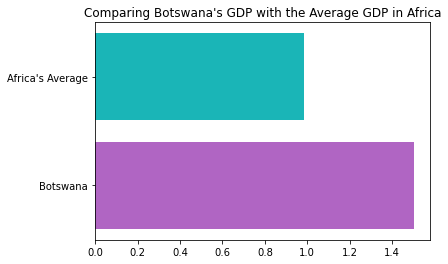

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey=True, figsize=(6, 4))
colors = ['#00ced1', '#ba55d3']
xvalues= [africa.gdp_per_capita.mean(), botswana.gdp_per_capita.mean()]
yvalues = ["Africa's Average", "Botswana"]
k = sns.barplot(x = xvalues , y = yvalues, palette=colors)
plt.title("Comparing Botswana's GDP with the Average GDP in Africa");

In [24]:
happy.happiness_score.mean()

5.55357534246575

In [14]:
botswana = africa.iloc[35]

In [10]:
column_options = ["happiness_score", "gdp_per_capita", "life_expectancy", 'perceived_corruption', 'social_support']

comparison_widgets = widgets.Dropdown( 
    options= column_options, 
    value="happiness_score", 
    description='Indicators' 
)

In [11]:
def compare_indicators(indicator):
    fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey=True, figsize=(6, 3))
    colors = ['#00ced1', '#ba55d3']
    xvalues= [happy[indicator].mean(), botswana[indicator]]
    yvalues = ['World Average', 'Botswana']
    k = sns.barplot(x = xvalues , y = yvalues, palette=colors)
    k.spines.right.set_visible(False)
    k.spines.top.set_visible(False)
    k.yaxis.set_ticks_position('left')
    k.xaxis.set_ticks_position('bottom')
    plt.title("Comparing Botswana's Happiness Indicators With World Average ({})".format(indicator));

In [12]:
widgets.interact(compare_indicators, 
                 indicator = comparison_widgets); 

interactive(children=(Dropdown(description='Indicators', options=('happiness_score', 'gdp_per_capita', 'life_e…